## 웹 로그데이터 분석

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [18]:
import matplotlib
from IPython.display import set_matplotlib_formats

#그래프 한글
matplotlib.rc('font', family='NanumGothic')
# mpl.rc('font', family='NanumGothic')
# 마이너스 표시
matplotlib.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')

In [19]:
import sqlite3

db_info_path = "data/dbinfo.db"
conn = sqlite3.connect(db_info_path)


### 사용 테이블 Load

In [37]:
query = "select * from 'order' where timestamp >= '2018-06-11' and timestamp < '2018-06-12'"
order = pd.read_sql(query, conn)
print(order.shape)
order.head()

(867, 5)


,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


In [26]:
query = "select * from 'user'"
user = pd.read_sql(query, conn)
print(user.shape)
user.head()

(10000, 3)


,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42


In [22]:
query = "select * from 'shop'"
shop = pd.read_sql(query, conn)
print(shop.shape)
shop.head()

(200, 5)


,shop_id,name,category,age,style
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일


In [38]:
query = "select * from 'log' where timestamp >= '2018-06-11' and timestamp < '2018-06-12'"
log = pd.read_sql(query, conn)
print(log.shape)
log.head()

(105815, 6)


,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN


### 2018.06.11 데이터 기준으로 분석 진행

#### 당일 매출 상위 10개 쇼핑몰

In [39]:
top10_table = pd.pivot_table(data=order, index="shop_id", values="price", aggfunc=["sum","count"])
top10_table.columns = ["sum", "count"]
top10_table = top10_table.sort_values("sum", ascending=False).iloc[:10]

top10_table

,sum,count
shop_id,,
22,1365200,99
14,872000,30
63,710700,27
32,707900,37
126,669400,39
6,655900,24
11,653000,19
60,558300,23
19,518400,19


Text(0.5, 1.0, '상위 매출 TOP 10')

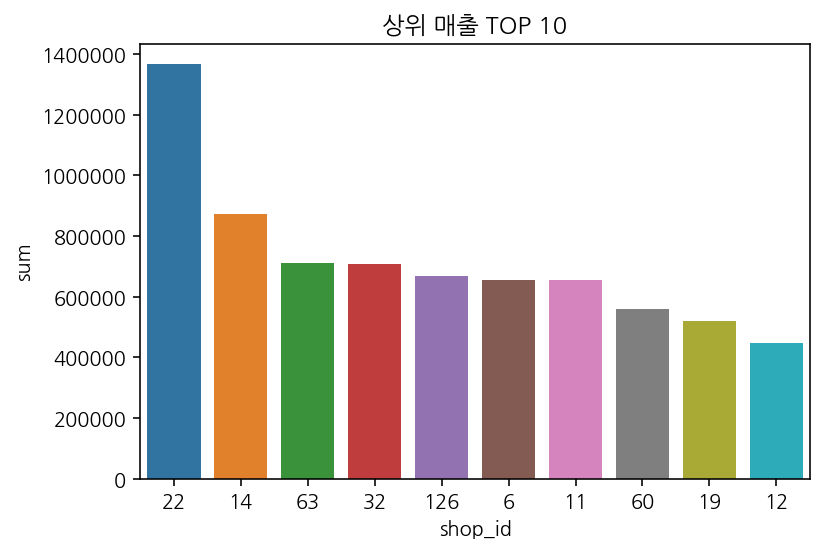

In [43]:
ax = sns.barplot(data=top10_table, x=top10_table.index , y="sum", order=top10_table.index)
ax.set_title("상위 매출 TOP 10")

#### 시간대별 매출 시각화

<Figure size 1296x360 with 0 Axes>

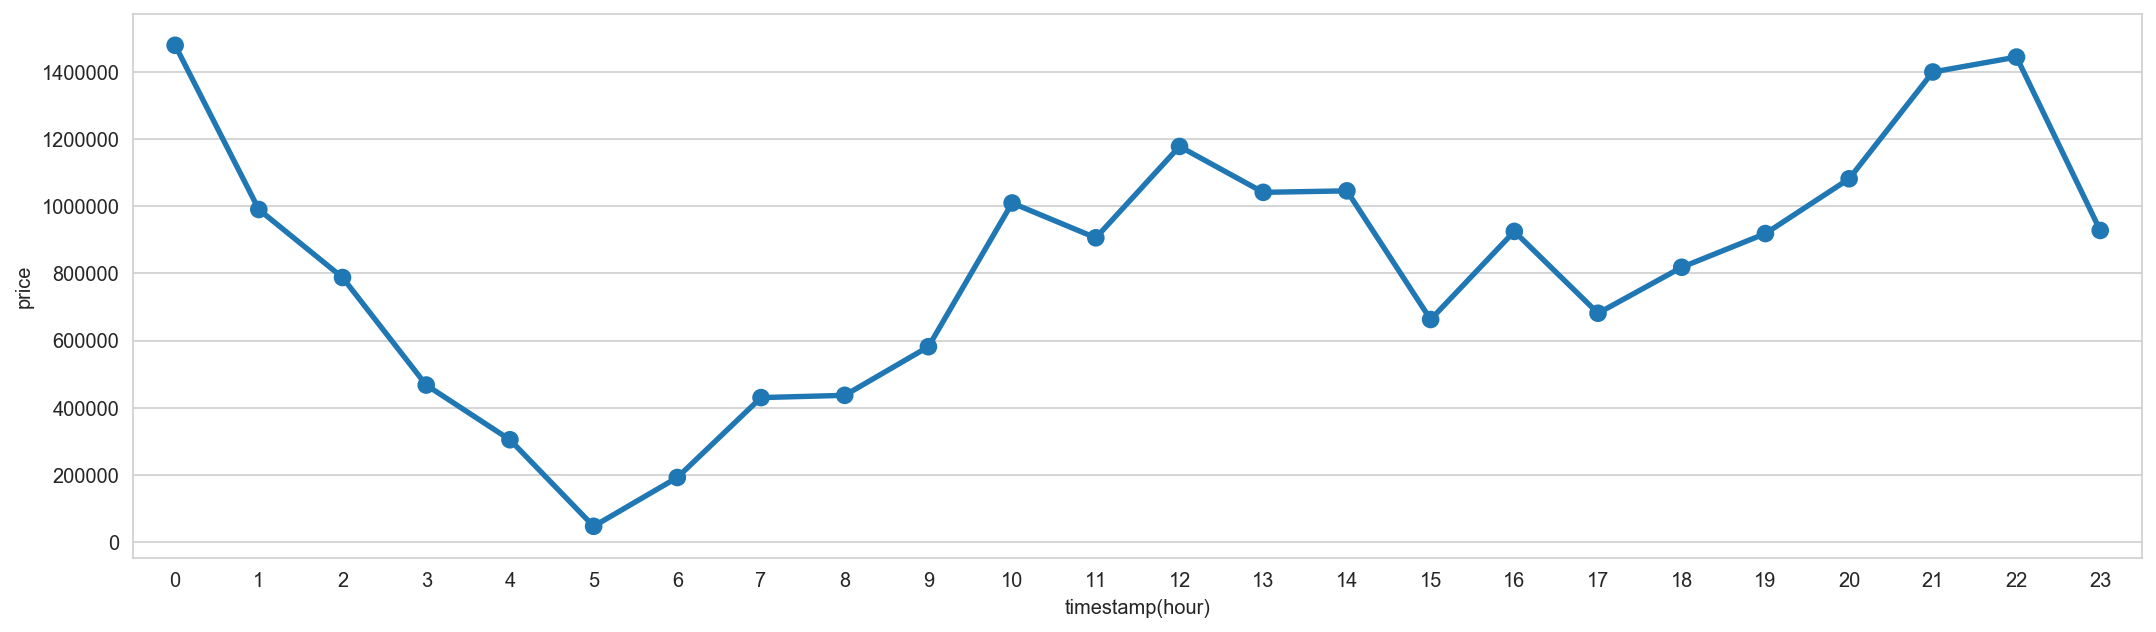

In [45]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,5))
order["timestamp"] = pd.to_datetime(order["timestamp"])
order["timestamp(hour)"] = order["timestamp"].dt.hour
plt.figure(figsize = (18,5))
sns.pointplot(data=order, x="timestamp(hour)", y="price", ci=0, estimator = np.sum)

#### 매출 Top 10 쇼핑몰 구매자들의 연령대 분석

In [46]:
order_user = order.merge(user, on="user_id", how='inner')
print(order_user.shape)
order_user.head()

(867, 8)


,timestamp,user_id,goods_id,shop_id,price,timestamp(hour),os,age
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17


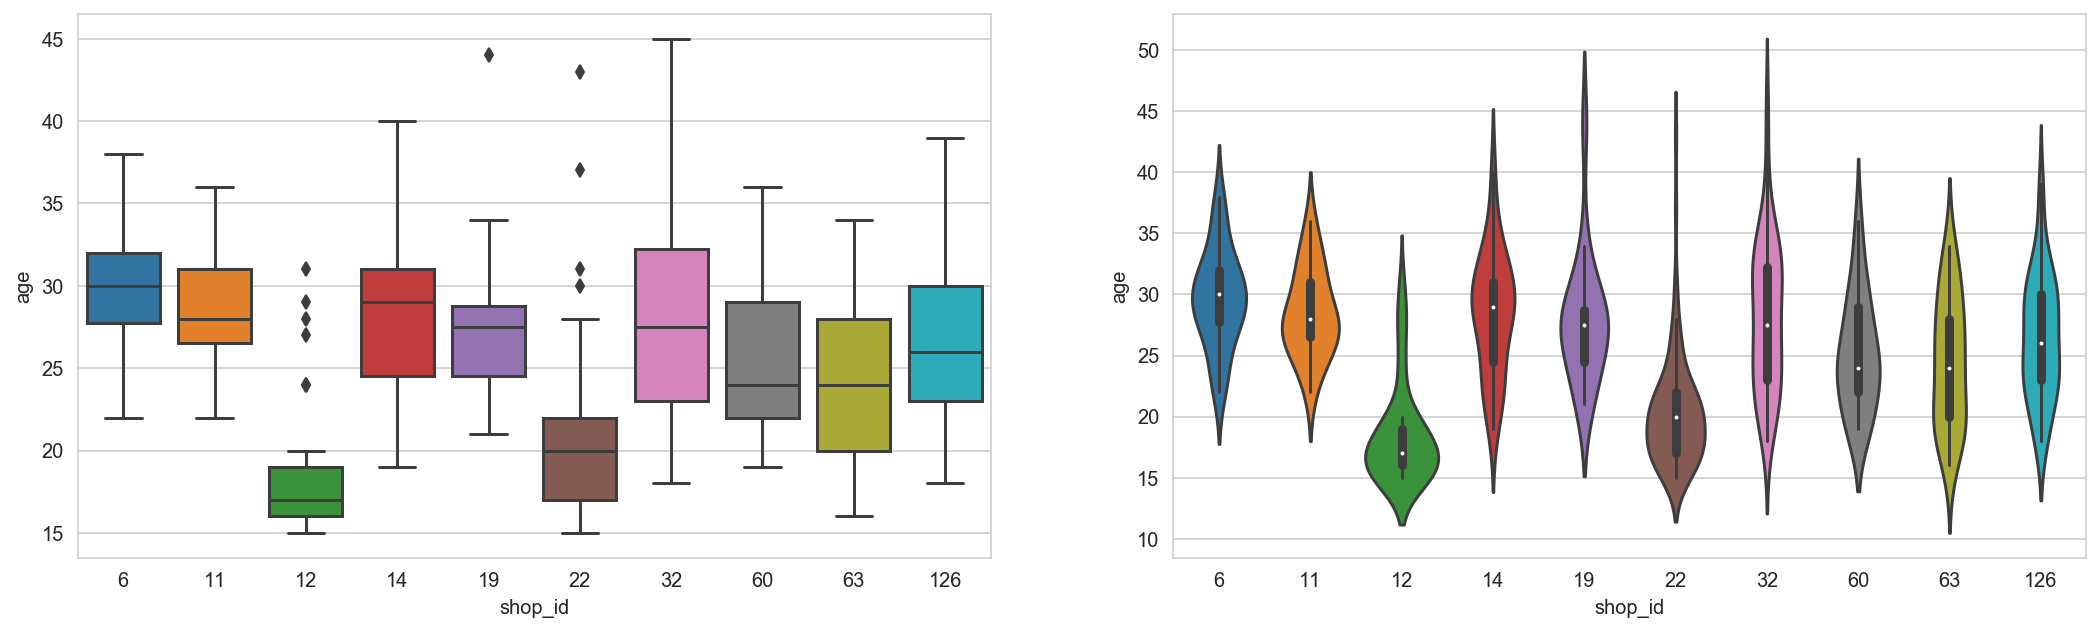

In [47]:
order_user["age"].unique()
order_user.loc[order_user["age"] < 0, "age"] = np.nan
order_user["age"].unique()
fig, axis = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,5)
top10_shop = order_user["shop_id"].isin(top10_table.index)
sns.boxplot(data=order_user[top10_shop], x="shop_id", y="age", ax=axis[0])
sns.violinplot(data=order_user[top10_shop], x="shop_id", y="age", ax=axis[1])

- 매출 TOP10 쇼핑몰은 대부분 20~30 연령대의 고객들이 주 고객층을 이루고 있는 것을 알 수 있다.
- 주 고객층의 연령대가 10대인 경우 고객 분포가 10대층에 몰려 있다. (12, 22) 아웃라이어가 많은 것은 아마 본인이 아닌 부모층에서 구매를 했을 가능성이 있어 보인다.

### 쇼핑몰 별 설정 거래연령과 실 거래연령 일치여부 분석

쇼핑몰에서 설정한 태그의 거래연령과 실제 구매자의 거래 연령의 일치여부를 분석.

In [48]:
def make_generation(age):
    if age == -1:
        return '미입력'
    elif age // 10 >= 4:
        return "30대 후반"
    elif age // 10 == 1:
        return "10대"
    elif age % 10 < 3:
        return str(age // 10 * 10) + f"대 초반"
    elif age % 10 <= 6:
        return str(age // 10 * 10) + f"대 중반"
    else:
        return str(age // 10 * 10) + f"대 후반"

In [49]:
user["generation"] = user["age"].apply(make_generation)
user[["age", "generation"]].head()

,age,generation
0,41,30대 후반
1,31,30대 초반
2,16,10대
3,41,30대 후반
4,42,30대 후반


In [59]:
total = order.merge(user, on="user_id").merge(shop, on="shop_id")
print(total.shape)
total.head(3)

(867, 13)


,timestamp,user_id,goods_id,shop_id,price,timestamp(hour),os,age_x,generation,name,category,age_y,style
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,And,37,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌


In [57]:
def check_generation(row):
    if row["category"] == "의류" and row["generation"] == "미입력" :
        return True
    else :
        return row["generation"] in str(row["age_y"])   

In [61]:
total["거래연령 일치여부"] = total.apply(check_generation, axis="columns")
total[["category", "generation", "age_y", "거래연령 일치여부"]].head(2)

,category,generation,age_y,거래연령 일치여부
0,의류,30대 후반,20대 후반/30대 초반/30대 중반,False
1,의류,30대 초반,20대 후반/30대 초반/30대 중반,True


In [62]:
total_table = pd.pivot_table(data=total, index="shop_id", values="거래연령 일치여부", aggfunc=["mean","count"])
total_table.head()

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
1,0.666667,3
2,0.937500,16
3,0.400000,5
4,1.000000,1
5,0.000000,1


In [63]:
total_table.loc[top10_table.index].sort_values("shop_id")

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
6,0.750000,24
11,0.684211,19
12,0.857143,42
14,0.566667,30
19,0.789474,19
22,0.929293,99
32,0.540541,37
60,0.695652,23


의류 외의 제품은 타겟 연령층이 없기 때무에 일치여부가 0으로 나왔음.
- 11/14/16 타겟 적합도 기간두고 모니터링 필요. 

### 스타일(태그)별 구매 연령층 시각화

In [64]:
style_list = ['페미닌', '모던시크', '심플베이직', '러블리', '유니크', '미시스타일', '캠퍼스룩', '빈티지', '섹시글램', '스쿨룩', '로맨틱', '오피스룩',
              '럭셔리', '헐리웃스타일', '심플시크', '키치', '펑키', '큐티', '볼드&에스닉' ]

In [65]:
shop_style = shop.copy()
shop_style = shop_style.set_index("shop_id")
print(shop_style.shape)
shop_style.head()

(200, 4)


,name,category,age,style
shop_id,,,,
1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리
2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직
3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직
4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크
5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일


In [66]:
for style in style_list:
    shop_style[f"{style}"] = False

print(shop_style.shape)
shop_style.head(2)

(200, 23)


,name,category,age,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,...,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
shop_id,,,,,,,,,,,,,,,,,,,,,
1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
shop_style.loc[shop_style["style"].isnull(), "category"].unique()

array(['란제리&파자마', '슈즈', '가방', '비치웨어', '임부복', '패션소품', '피트니스'], dtype=object)

In [69]:
def encode_style_list(df):
    for i in df.index :       
        value = df.loc[i,"style"]
        if pd.notnull(value) :
            styles = value.split("/")
            for style in styles :
                df.loc[i,style] = True
    return df
 
shop_style = encode_style_list(shop_style)
print(shop_style.shape)
shop_style.head(3)

(200, 23)


,name,category,age,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,...,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
shop_id,,,,,,,,,,,,,,,,,,,,,
1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [72]:
merged = (
    order.merge(shop_style, on='shop_id')
             .merge(user, on='user_id')
)
print(merged.shape)
#merged.head(3)

(867, 32)


### 구매횟수를 기준으로 TOP3 스타일의 구매 연령대 분포 시각화

In [71]:
count_top3 = merged[style_list].sum()
count_top3 = count_top3.sort_values(ascending=False).iloc[:3]
count_top3

심플베이직    460
러블리      371
모던시크     121
dtype: int64

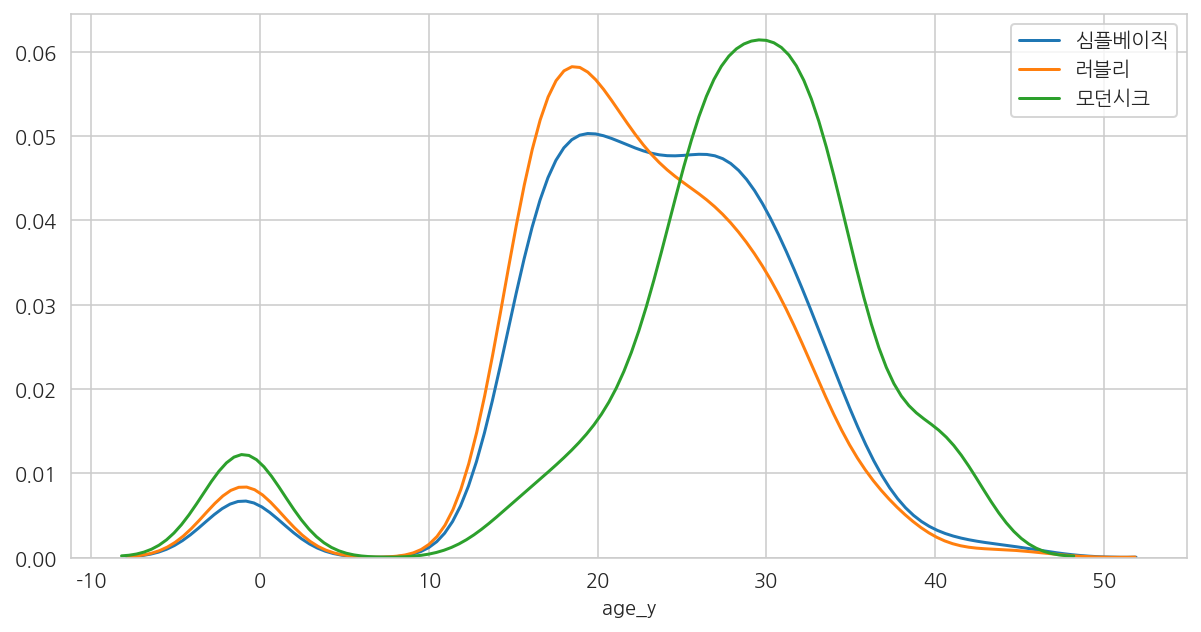

In [75]:
matplotlib.rc('font', family='NanumGothic') # Mac의 경우는 AppleGothic, 윈도우의 경우는 Malgun Gothic을 사용하면 됩니다 :) 
matplotlib.rc('axes', unicode_minus=False)

top1 = merged[merged[count_top3.index[0]]]
top2 = merged[merged[count_top3.index[1]]]
top3 = merged[merged[count_top3.index[2]]]                

plt.figure(figsize=(10,5))
sns.distplot(top1["age_y"], hist=False ,label=count_top3.index[0])
sns.distplot(top2["age_y"], hist=False ,label=count_top3.index[1])
sns.distplot(top3["age_y"], hist=False ,label=count_top3.index[2])
